In [2]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [17]:
# Load the dictionary from the JSON file for images with Background
json_file_BG = 'data&labelsBG.json'
with open(json_file_BG, 'r') as f:
    image_dict_BG = json.load(f)

# Load images and labels from the dictionary
image_paths_BG, labels_BG = zip(*image_dict_BG.items())

# Encode labels
label_encoder_BG = LabelEncoder()
labels_BG = label_encoder_BG.fit_transform(labels_BG)

# Load images and resize them to a fixed size
images_BG = []
for image_path in image_paths_BG:
    img_BG = cv2.imread(image_path)
    img_BG = cv2.resize(img_BG, (100, 100))  # Resize to 100x100 (adjust as needed)
    images_BG.append(img_BG)

images_BG = np.array(images_BG)

In [8]:
# Load the dictionary from the JSON file for no backgrounds (Clear)
json_file_C = 'data&labels.json'
with open(json_file_C, 'r') as f:
    image_dict_C = json.load(f)

# Load images and labels from the dictionary
image_paths_C, labels_C = zip(*image_dict_C.items())

# Encode labels
label_encoder_C = LabelEncoder()
labels_C = label_encoder_C.fit_transform(labels_C)

# Load images and resize them to a fixed size
images_C = []
for image_path in image_paths_C:
    img_C = cv2.imread(image_path)
    img_C = cv2.resize(img_C, (100, 100))  # Resize to 100x100 (adjust as needed)
    images_C.append(img_C)

images_C = np.array(images_C)

In [20]:
# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(images_BG, labels_BG, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train_1 = X_train_1.astype('float32') / 255.0
X_test_1 = X_test_1.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train_1 = to_categorical(y_train_1)
y_test_1 = to_categorical(y_test_1)

# Define the model
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(X_train_1, y_train_1, epochs=10, batch_size=32, validation_data=(X_test_1, y_test_1))

# Evaluate the model
loss_1, accuracy_1 = model_1.evaluate(X_test_1, y_test_1)
print(f'Loss: {loss_1}, Accuracy: {accuracy_1}')

Epoch 1/10
26/26 [==============================] - 2s 80ms/step - loss: 1.6340 - accuracy: 0.2184 - val_loss: 1.5973 - val_accuracy: 0.1942
Epoch 2/10
26/26 [==============================] - 2s 76ms/step - loss: 1.5716 - accuracy: 0.2658 - val_loss: 1.5053 - val_accuracy: 0.3495
Epoch 3/10
26/26 [==============================] - 2s 77ms/step - loss: 1.4283 - accuracy: 0.3799 - val_loss: 1.4255 - val_accuracy: 0.3786
Epoch 4/10
26/26 [==============================] - 2s 77ms/step - loss: 1.2348 - accuracy: 0.4939 - val_loss: 1.3673 - val_accuracy: 0.4563
Epoch 5/10
26/26 [==============================] - 2s 80ms/step - loss: 1.0886 - accuracy: 0.5643 - val_loss: 1.4423 - val_accuracy: 0.4175
Epoch 6/10
26/26 [==============================] - 2s 78ms/step - loss: 0.8558 - accuracy: 0.6990 - val_loss: 1.4521 - val_accuracy: 0.4466
Epoch 7/10
26/26 [==============================] - 2s 77ms/step - loss: 0.6286 - accuracy: 0.7852 - val_loss: 1.6916 - val_accuracy: 0.4515
Epoch 8/10
26

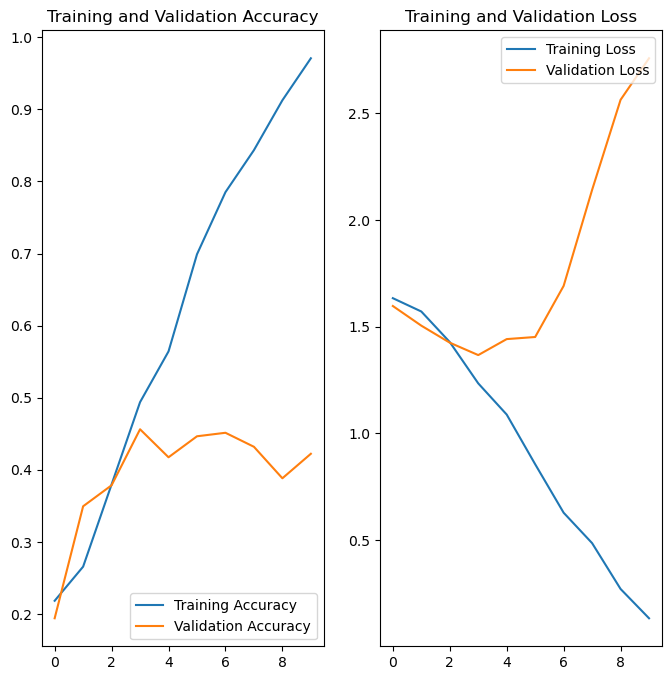

In [21]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

epochs_range_1 = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_1, acc_1, label='Training Accuracy')
plt.plot(epochs_range_1, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_1, loss_1, label='Training Loss')
plt.plot(epochs_range_1, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(images_C, labels_C, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train_2 = X_train_2.astype('float32') / 255.0
X_test_2 = X_test_2.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train_2 = to_categorical(y_train_2)
y_test_2 = to_categorical(y_test_2)

# Define the model
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(X_train_2, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_2, y_test_2))

# Evaluate the model
loss_2, accuracy_2 = model_1.evaluate(X_test_2, y_test_2)
print(f'Loss: {loss_2}, Accuracy: {accuracy_2}')

Epoch 1/10
26/26 [==============================] - 2s 79ms/step - loss: 1.5871 - accuracy: 0.2840 - val_loss: 1.6330 - val_accuracy: 0.3641
Epoch 2/10
26/26 [==============================] - 2s 76ms/step - loss: 1.3715 - accuracy: 0.4502 - val_loss: 1.4672 - val_accuracy: 0.4223
Epoch 3/10
26/26 [==============================] - 2s 76ms/step - loss: 1.0940 - accuracy: 0.5837 - val_loss: 1.4883 - val_accuracy: 0.4320
Epoch 4/10
26/26 [==============================] - 2s 80ms/step - loss: 0.7771 - accuracy: 0.7233 - val_loss: 1.5095 - val_accuracy: 0.4126
Epoch 5/10
26/26 [==============================] - 2s 75ms/step - loss: 0.4539 - accuracy: 0.8422 - val_loss: 1.8024 - val_accuracy: 0.4175
Epoch 6/10
26/26 [==============================] - 2s 76ms/step - loss: 0.2892 - accuracy: 0.9102 - val_loss: 2.2463 - val_accuracy: 0.3786
Epoch 7/10
26/26 [==============================] - 2s 75ms/step - loss: 0.1153 - accuracy: 0.9648 - val_loss: 2.5535 - val_accuracy: 0.4612
Epoch 8/10
26

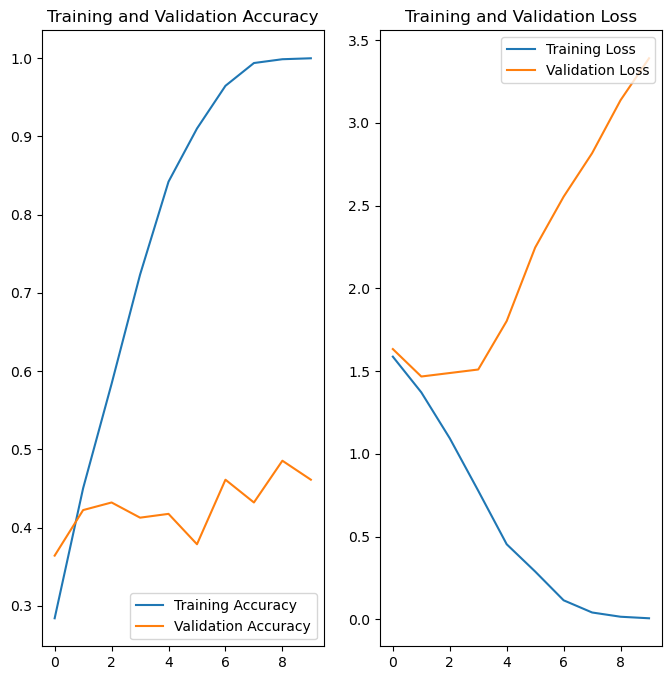

In [23]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_range_2 = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_2, acc_2, label='Training Accuracy')
plt.plot(epochs_range_2, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_2, loss_2, label='Training Loss')
plt.plot(epochs_range_2, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Load the ResNet-50 model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a new output layer for the number of dog breeds (5 in this case)
predictions = Dense(5, activation='softmax')(x)

# Create a new model with the modified base model
model_3 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on your dataset
history_3 = model_3.fit(X_train_2, y_train_2, epochs=20, validation_data=(X_test_2, y_test_2))

# Evaluate the model
loss_3, accuracy_3 = model_3.evaluate(X_test_2, y_test_2)
print(f'Loss: {loss_3}, Accuracy: {accuracy_3}')

Epoch 1/20
26/26 [==============================] - 8s 272ms/step - loss: 1.6714 - accuracy: 0.2100 - val_loss: 1.5840 - val_accuracy: 0.2621
Epoch 2/20
26/26 [==============================] - 7s 259ms/step - loss: 1.5697 - accuracy: 0.2791 - val_loss: 1.5709 - val_accuracy: 0.2573
Epoch 3/20
26/26 [==============================] - 7s 270ms/step - loss: 1.5499 - accuracy: 0.2913 - val_loss: 1.5600 - val_accuracy: 0.3350
Epoch 4/20
26/26 [==============================] - 7s 274ms/step - loss: 1.5506 - accuracy: 0.2937 - val_loss: 1.5387 - val_accuracy: 0.3155
Epoch 5/20
26/26 [==============================] - 7s 278ms/step - loss: 1.5066 - accuracy: 0.3386 - val_loss: 1.5190 - val_accuracy: 0.3398
Epoch 6/20
26/26 [==============================] - 7s 275ms/step - loss: 1.4916 - accuracy: 0.3434 - val_loss: 1.5060 - val_accuracy: 0.3447
Epoch 7/20
26/26 [==============================] - 7s 278ms/step - loss: 1.4766 - accuracy: 0.3689 - val_loss: 1.5113 - val_accuracy: 0.3738
Epoch 

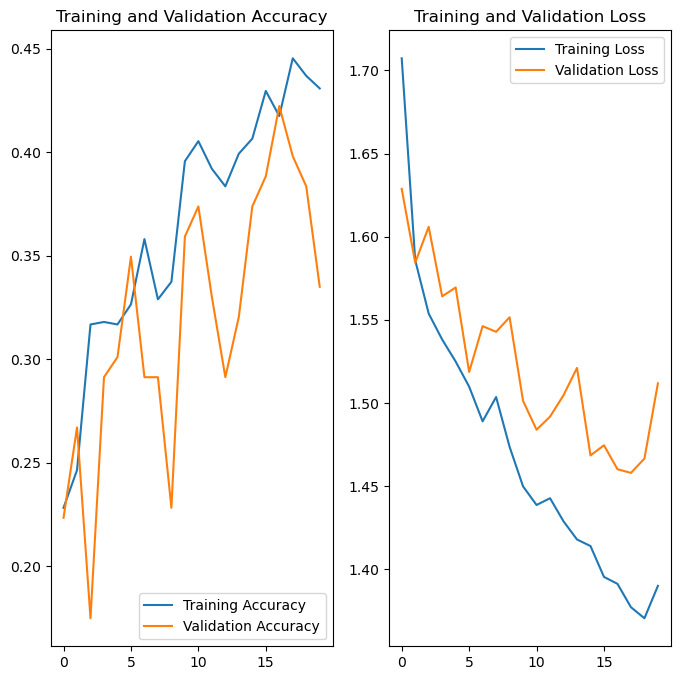

In [7]:
acc_3 = history_3.history['accuracy']
val_acc_3 = history_3.history['val_accuracy']

loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

epochs_range_3 = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_3, acc_3, label='Training Accuracy')
plt.plot(epochs_range_3, val_acc_3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_3, loss_3, label='Training Loss')
plt.plot(epochs_range_3, val_loss_3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()